In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp


e = 1.602e-19     # Elementarladung [C]
d = 1e-3          # Probendicke [m]
l = 20e-3         # Probenlänge [m]
b = 10e-3         # Probenbreite [m]
A = d * b         # Querschnittsfläche [m²]

R_H = (-1.32+/-0.01)e-06 [m^3/As]
n = (-4.71+/-0.02)e+24 [1/m³]


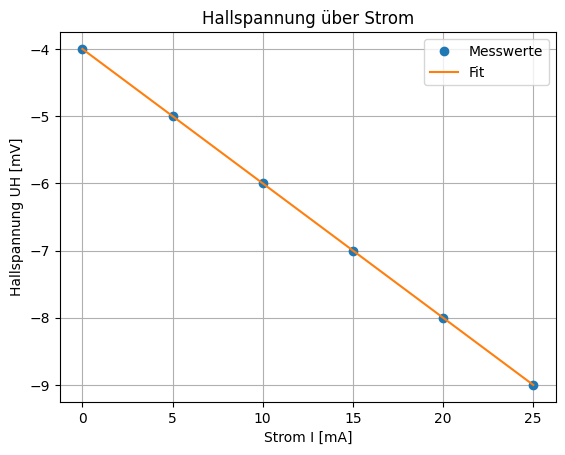

In [4]:
#Aufgabe 1 U_H(I) Plot

I_B =  ufloat(3.1, 0)                                                   # Eingangsstrom von der Spule
Magnetfeld = ufloat(48.70, 0.25)*I_B                                    # Magnetfeld unter dem Strom I_B=3.1A
Schwingungsdauer = np.array([0, 0.005, 0.010, 0.015, 0.020, 0.025])          # Der strom der druch die Probe fließt
Hall_Spannung = np.array([-4, -5, -6, -7, -8, -9])*1e-3                 # spannung in mV


# Fit berechnen
Gerade, intercept, r_value, p_value, stderr = linregress(Schwingungsdauer, Hall_Spannung)
Gerade_unsich = ufloat(Gerade, stderr)

# Hall-konstante berechnen: RH = steigung * d / B
RH = Gerade_unsich * d / Magnetfeld
n = 1 / (e * RH)

print(f"R_H = {RH:.2e} [m^3/As]")
print(f"n = {n:.2e} [1/m³]") 

# Plot
plt.figure()
plt.plot(Schwingungsdauer * 1e3, Hall_Spannung * 1e3, 'o', label='Messwerte')
plt.plot(Schwingungsdauer * 1e3, Gerade * Schwingungsdauer * 1e3 + intercept * 1e3, label='Fit')
plt.xlabel("Strom I [mA]")
plt.ylabel("Hallspannung UH [mV]")
plt.title("Hallspannung über Strom")
plt.legend()
plt.grid()
plt.show()

R_H = (1.643+/-0)e-03 [m^3/As]
n = (3.800+/-0)e+21 [1/m³]

R_H umgepolt = (-1.643+/-0)e-03 [m^3/As]
n umgepolt = (-3.800+/-0)e+21 [1/m³]


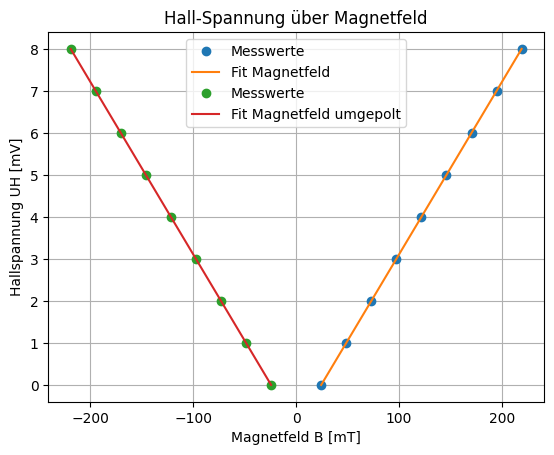

In [5]:
#Aufgabe 2,3,4 U_H(B) normal und umgepolt plot

I_probe = ufloat(0.025,0)                                                             # Probenstrom bleibt absofort gleich
I_B = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])               # Magnetfeldstrom wird erhöht
I_B_umgepolt = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]) 

Magnetfeld = 48.7e-3 * I_B                                                  # gegebene Eichung vom Feld
Magnetfeld_umgepolt = -48.7e-3 * I_B_umgepolt                               #bin mir beim umpolen nicht sicher, hab jetzt einfach ein minus davor gemacht

UH_B = np.array([0.0, 1, 2, 3, 4, 5, 6, 7, 8])*1e-3
UH_B_umgepolt = np.array([0.0, 1, 2, 3, 4, 5, 6, 7, 8])*1e-3              

U_B = np.array([120, 124, 125, 129, 134, 140, 146, 153, 161])


# Fit UH(B))
Gerade, intercept, _, _, stderr = linregress(Magnetfeld, UH_B)
Gerade_unsich = ufloat(Gerade, stderr)
RH = Gerade_unsich * d / I_probe
n = 1 / (e * RH)

# Fit UH(B)) umgepolt (hier werden RH und n nicht berrechnet)
Gerade2, intercept2, _, _, stderr2 = linregress(Magnetfeld_umgepolt, UH_B_umgepolt)
Gerade_unsich2 = ufloat(Gerade2, stderr2)
RH_2 = Gerade_unsich2 * d / I_probe
n_2 = 1 / (e * RH_2)

print(f"R_H = {RH:.3e} [m^3/As]")
print(f"n = {n:.3e} [1/m³]")
print()
print(f"R_H umgepolt = {RH_2:.3e} [m^3/As]")
print(f"n umgepolt = {n_2:.3e} [1/m³]")

# Plot
plt.figure()
plt.plot(Magnetfeld * 1e3, UH_B * 1e3, 'o', label='Messwerte')
plt.plot(Magnetfeld * 1e3, Gerade * Magnetfeld * 1e3 + intercept * 1e3, label='Fit Magnetfeld')

plt.plot(Magnetfeld_umgepolt * 1e3, UH_B_umgepolt * 1e3, 'o', label='Messwerte')
plt.plot(Magnetfeld_umgepolt * 1e3, Gerade2 * Magnetfeld_umgepolt * 1e3 + intercept2 * 1e3, label='Fit Magnetfeld umgepolt')


plt.xlabel("Magnetfeld B [mT]")
plt.ylabel("Hallspannung UH [mV]")
plt.title("Hall-Spannung über Magnetfeld")
plt.legend()
plt.grid()
plt.show()

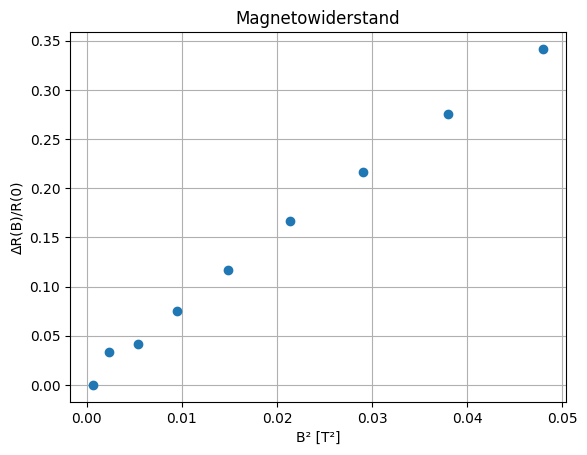

NameError: name 'n2' is not defined

In [6]:
#Aufgabe 5 Magneto widerstand n-Germanium
Probenstrom = 0.025
widerstand = U_B / Probenstrom
R0 = widerstand[0]                  #der widerstand bei 0
Differenz = (widerstand - R0) / R0  #ΔR(B)/R(0)

#Plotten B^2 als abszisse (x-achse) weil laut theorethischen modellen ΔR(B)/R(0) direkt proportional zu B^2 sein sollte (also eine gerade).

plt.figure()
plt.plot(Magnetfeld**2, Differenz, 'o')
plt.xlabel("B² [T²]")
plt.ylabel("ΔR(B)/R(0)")
plt.title("Magnetowiderstand")
plt.grid()
plt.show()

# Leitfähigkeit und Beweglichkeit
R0_u = ufloat(R0, 0)
sigma = l / (R0_u * A)
mu_n = sigma / (n2 * e)

print()
print(f"R(0) = {R0_u:.2e} Ω")
print(f"σ = {sigma:.2e} S/m")
print(f"µ_n = {mu_n:.2e} m²/Vs = {mu_n * 1e4:.2f} cm²/Vs")

R_H = (1.643+/-0)e-03 [m^3/As]
p = (3.800+/-0)e+21 [1/m³]

R_H umgepolt = (-1.643+/-0)e-03 [m^3/As]
p umgepolt = (-3.800+/-0)e+21 [1/m³]


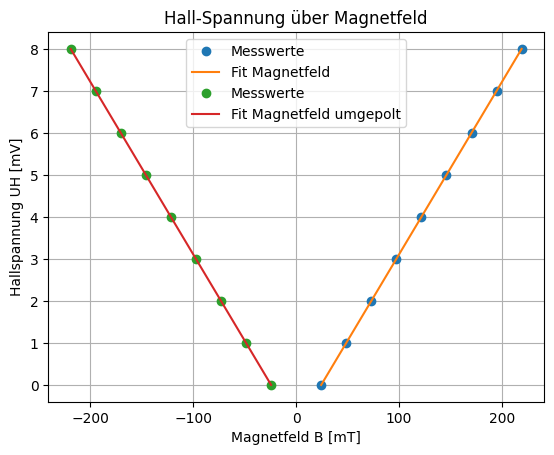

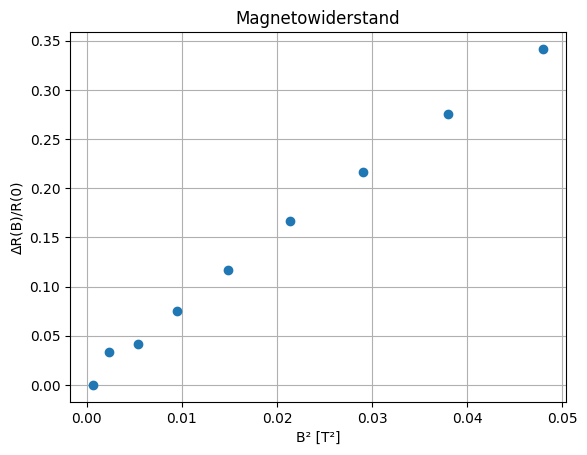


R(0) = (4.80+/-0)e+03 Ω
σ = (4.17+/-0)e-01 S/m
µ_p = (6.84+/-0)e-04 m²/Vs = 6.84+/-0 cm²/Vs


In [ ]:
#Aufgabe 6, nochmal 2,3,4,5 nur mit p-Germanium

I_probe = ufloat(0.025,0)                                                             # Probenstrom bleibt absofort gleich
I_B = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])               # Magnetfeldstrom wird erhöht
I_B_umgepolt = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]) 

Magnetfeld = 48.7e-3 * I_B                                                  # gegebene Eichung vom Feld
Magnetfeld_umgepolt = -48.7e-3 * I_B_umgepolt                               #bin mir beim umpolen nicht sicher, hab jetzt einfach ein minus davor gemacht

UH_B = np.array([0.0, 1, 2, 3, 4, 5, 6, 7, 8])*1e-3
UH_B_umgepolt = np.array([0.0, 1, 2, 3, 4, 5, 6, 7, 8])*1e-3              

U_B = np.array([120, 124, 125, 129, 134, 140, 146, 153, 161])


# Fit UH(B))
Gerade, intercept, _, _, stderr = linregress(Magnetfeld, UH_B)
Gerade_unsich = ufloat(Gerade, stderr)
RH = Gerade_unsich * d / I_probe
n = 1 / (e * RH)

# Fit UH(B)) umgepolt (hier werden RH und n nicht berrechnet)
Gerade2, intercept2, _, _, stderr2 = linregress(Magnetfeld_umgepolt, UH_B_umgepolt)
Gerade_unsich2 = ufloat(Gerade2, stderr2)
RH_2 = Gerade_unsich2 * d / I_probe
n_2 = 1 / (e * RH_2)

print(f"R_H = {RH:.3e} [m^3/As]")
print(f"p = {n:.3e} [1/m³]")
print()
print(f"R_H umgepolt = {RH_2:.3e} [m^3/As]")
print(f"p umgepolt = {n_2:.3e} [1/m³]")

# Plot
plt.figure()
plt.plot(Magnetfeld * 1e3, UH_B * 1e3, 'o', label='Messwerte')
plt.plot(Magnetfeld * 1e3, Gerade * Magnetfeld * 1e3 + intercept * 1e3, label='Fit Magnetfeld')

plt.plot(Magnetfeld_umgepolt * 1e3, UH_B_umgepolt * 1e3, 'o', label='Messwerte')
plt.plot(Magnetfeld_umgepolt * 1e3, Gerade2 * Magnetfeld_umgepolt * 1e3 + intercept2 * 1e3, label='Fit Magnetfeld umgepolt')


plt.xlabel("Magnetfeld B [mT]")
plt.ylabel("Hallspannung UH [mV]")
plt.title("Hall-Spannung über Magnetfeld")
plt.legend()
plt.grid()
plt.show()


#Magnetowiderstand p-Germanium 

Probenstrom = 0.025
widerstand = U_B / Probenstrom
R0 = widerstand[0]                  #der widerstand bei 0
Differenz = (widerstand - R0) / R0  #ΔR(B)/R(0)

plt.figure()
plt.plot(Magnetfeld**2, Differenz, 'o')
plt.xlabel("B² [T²]")
plt.ylabel("ΔR(B)/R(0)")
plt.title("Magnetowiderstand")
plt.grid()
plt.show()

# Leitfähigkeit und Beweglichkeit
R0_u = ufloat(R0, 0)
sigma = l / (R0_u * A)
mu_n = sigma / (n2 * e)

print()
print(f"R(0) = {R0_u:.2e} Ω")
print(f"σ = {sigma:.2e} S/m")
print(f"µ_p = {mu_n:.2e} m²/Vs = {mu_n * 1e4:.2f} cm²/Vs")

g = 10.3647 [m/s^2]
k = -3.8089

Unsicherheit = 0.0293


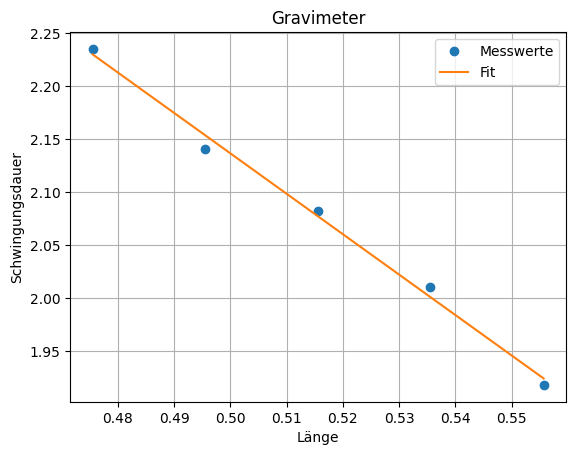

g_unsicher = 10.3667+/-0.0789


In [45]:
#Pendel Gravimeter


Schwingungsdauer = np.array([1.385, 1.418, 1.443, 1.463, 1.495])**2        
Länge_1 = np.array([47.55, 49.55, 51.55, 53.55, 55.57])*1e-2
Länge = Länge_1[::-1]            


# Fit berechnen
Gerade, intercept, r_value, p_value, stderr = linregress(Länge, Schwingungsdauer)
Gerade_unsich = ufloat(Gerade, stderr)

g = -(4 * np.pi**2)/Gerade

print(f"g = {g:.4f} [m/s^2]")
print(f"k = {Gerade:.4f}")
print()
print(f"Unsicherheit = {stderr**2:.4f}")
# Plot
plt.figure()
plt.plot(Länge, Schwingungsdauer, 'o', label='Messwerte')
plt.plot(Länge, Gerade * Länge + intercept , label='Fit')
plt.xlabel("Länge")
plt.ylabel("Schwingungsdauer")
plt.title("Gravimeter")
plt.legend()
plt.grid()
plt.show()

k = ufloat(-3.8082,0.029)
g_1 = -(4 * np.pi**2)/k
print(f"g_unsicher = {g_1:.4f}")